### Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

#### Importing Necesary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import missingno as msno

#Importing DataCleaning Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Importing Predictive Models 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.cross_decomposition import PLSRegression
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV


#Importing model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

#Importing Lasso and Ridge for Regularization
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

import joblib


In [2]:
#Loading Training Dataset
BDM_train = pd.read_csv('bigdatamart_Train.csv')
BDM_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
BDM_train.shape

(8523, 12)

### About Dataset

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particulat store. This is the outcome variable to be predicted.

In [4]:
#Checking features datatypes

BDM_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# Checking for duplicated records
BDM_train.duplicated().sum()

0

In [6]:
#Statistical Analysis of Numerical Data
BDM_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


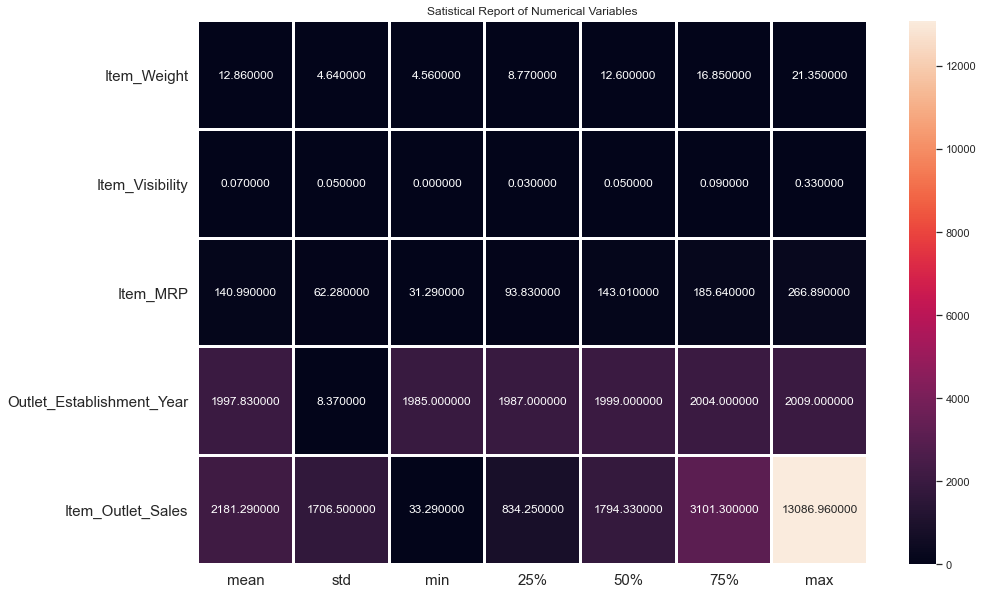

In [7]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(BDM_train.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

- Item Weight : 
    - mean = 12.86
    - std = 4.640
    - max = 21.35
    - min = 4.56
    
- Item Visiblity : 
    - mean = 0.07
    - std = 0.05
    - max = 0.33
    - min = 0
    
- Item MRP : 
    - mean = 140.99
    - std = 62.28
    - max = 266.89
    - min = 31.29
    
- Outlet_Establishment_Year : 
    - mean = 19987
    - std = 8.37
    - max = 2009
    - min = 1985
    
- Item Outlet_Sales : 
    - mean = 2181.29
    - std = 1706.5
    - max = 13086.96
    - min = 33.29


<AxesSubplot:>

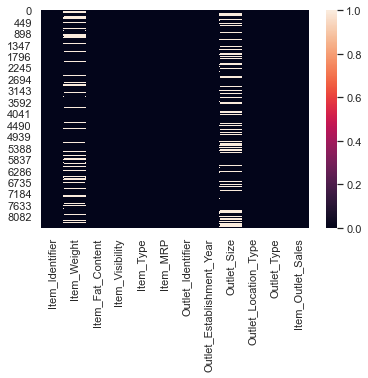

In [8]:
#Visualising Null Values with heatmap
sns.heatmap(BDM_train.isnull())

### Exploratory Data Analysis

#### Univariate analysis of Categorical Features

In [9]:
# Checking feature Datatype to perform univariate analysis
BDM_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

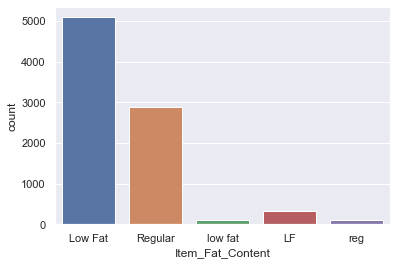

In [10]:
#Univariate Analysis for Item_Fat_Content
sns.countplot(BDM_train['Item_Fat_Content'])

we have 5 categories for Item_Fat_Content column. But it seems like categories are repeated and this feature needs data cleaning.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

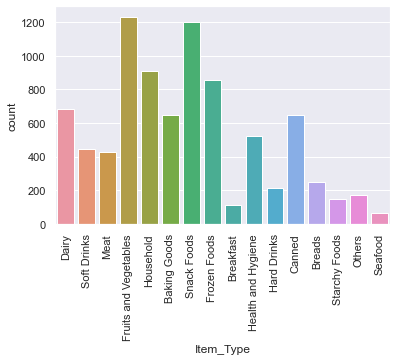

In [11]:
#Univariate Analysis for Item_Type
sns.countplot(BDM_train['Item_Type'])
plt.xticks(rotation = 90)

It looks like we have 16 categories in this column

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

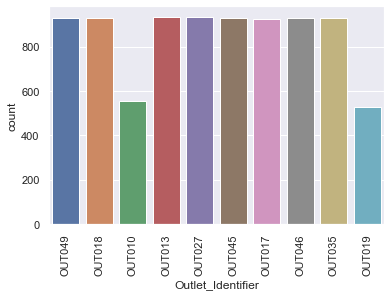

In [12]:
#Univariate Analysis ofOutlet_Identifier
sns.countplot(BDM_train['Outlet_Identifier'])
plt.xticks(rotation = 90)

We have recods of 10 different Outlets

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

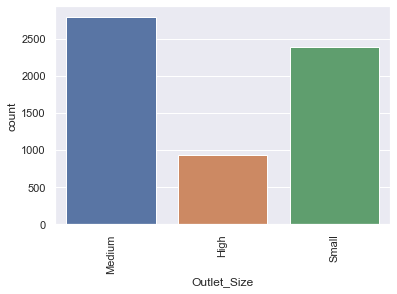

In [13]:
#Univariate Analysis of Outlet_Size


sns.countplot(BDM_train['Outlet_Size'])
plt.xticks(rotation = 90)

We've 3 sizes of outlets

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

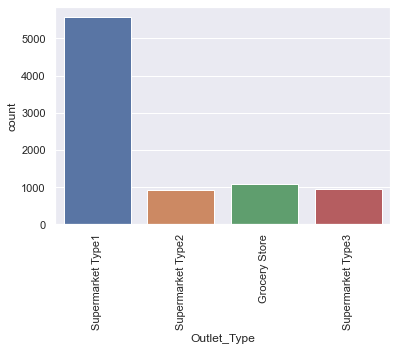

In [14]:
#Univaiate Analysis of Outlet_Type


sns.countplot(BDM_train['Outlet_Type'])
plt.xticks(rotation = 90)

We have 4 Outlet types.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

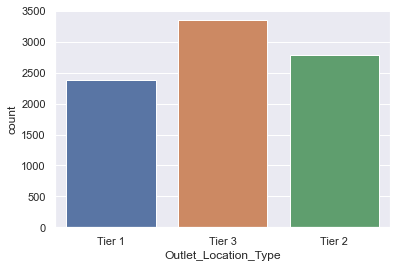

In [15]:
#Univariate Analysis of Outlet_Location_type
sns.countplot(BDM_train['Outlet_Location_Type'])


We've 3 Tier Location.

#### Bivariate analysis 

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

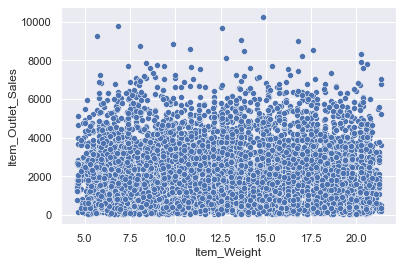

In [16]:
sns.scatterplot(data = BDM_train, x = "Item_Weight", y = "Item_Outlet_Sales")
#Item weight do not play a significant role in item sales

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

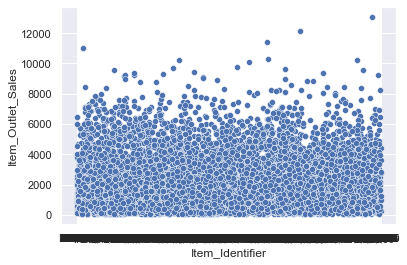

In [17]:
sns.scatterplot(data = BDM_train, x = "Item_Identifier", y = "Item_Outlet_Sales")
#Item type do not play a significant role in item sales

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

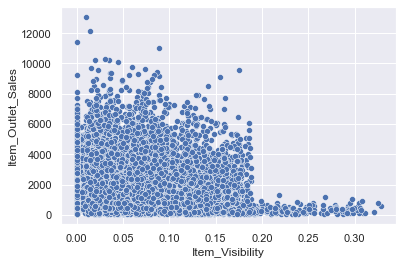

In [18]:
sns.scatterplot(data = BDM_train, x = "Item_Visibility", y = "Item_Outlet_Sales")
#Item sales decreases as the the item visibility decreases and vice versa

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

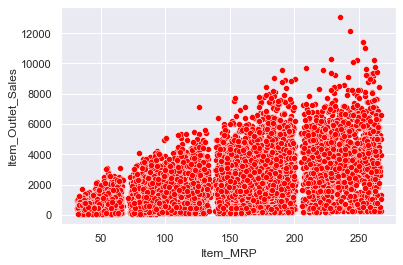

In [19]:
sns.scatterplot(data = BDM_train, x = "Item_MRP", y = "Item_Outlet_Sales", color = 'red' )

#Item Sales increases as the ITem MRP increases

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

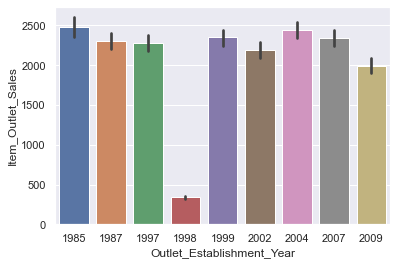

In [20]:
sns.barplot(data = BDM_train, x = "Outlet_Establishment_Year", y = "Item_Outlet_Sales")
#Highest Sales were in year 1985 and 2004

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

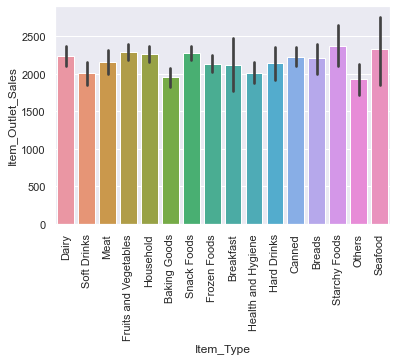

In [21]:
sns.barplot(data = BDM_train, x = "Item_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90)
#Item type donot have any significant role in sales of the item


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

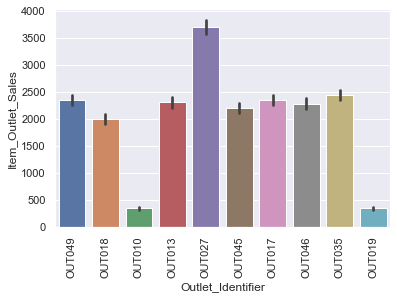

In [22]:
sns.barplot(data = BDM_train, x = "Outlet_Identifier", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90)

# Outlet OUT027 have the highest Sales and OUT010 have the lowest item sales


(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

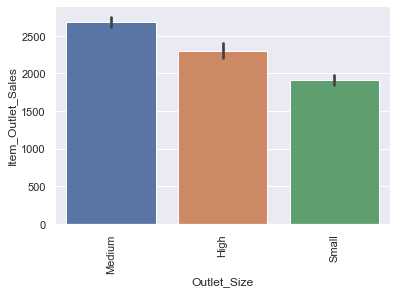

In [23]:
sns.barplot(data = BDM_train, x = "Outlet_Size", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90)

#medium outlet capacity makes more sales than small and high size

(array([0, 1, 2]),
 [Text(0, 0, 'Tier 1'), Text(1, 0, 'Tier 3'), Text(2, 0, 'Tier 2')])

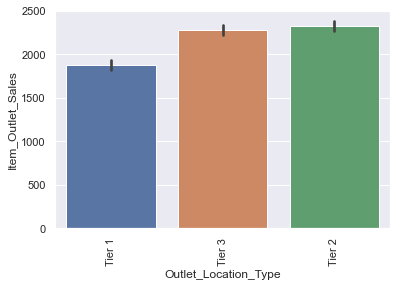

In [24]:
sns.barplot(data = BDM_train, x = "Outlet_Location_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 90)

# Tier 2 and Tier 3 Outlet_Location_Type did better sales than Tier 1

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

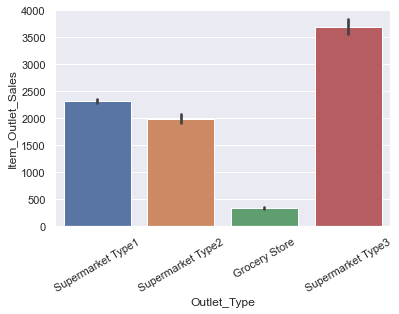

In [25]:
sns.barplot(data = BDM_train, x = "Outlet_Type", y = "Item_Outlet_Sales")
plt.xticks(rotation = 30)

#Supermarket Type 3 makes the most sales and Grocery stores makes the least item sales

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

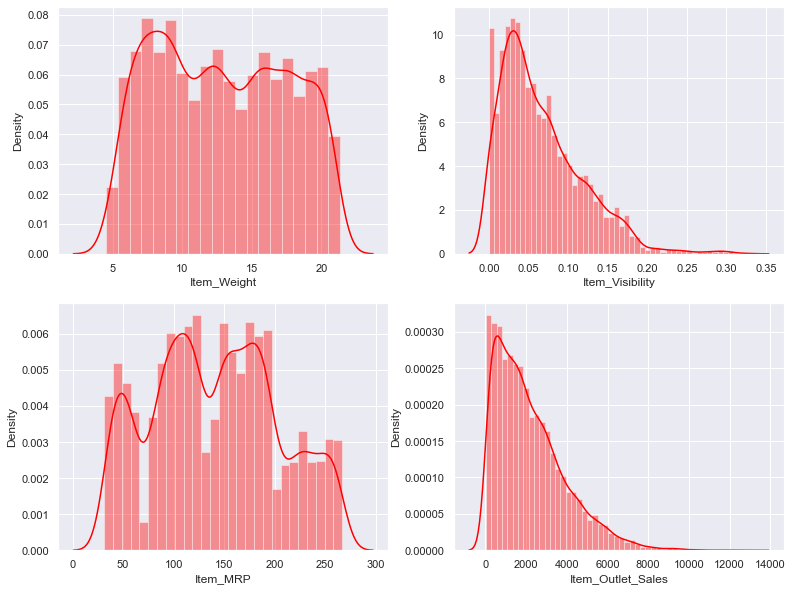

In [26]:
# Multivariate Analaysis

fig,ax = plt.subplots(2,2, figsize = (13,10))

sns.distplot(BDM_train['Item_Weight'], color = 'Red', ax = ax[0][0])
sns.distplot(BDM_train['Item_Visibility'], color = 'Red',ax = ax[0][1])
sns.distplot(BDM_train['Item_MRP'], color = 'Red', ax = ax[1][0])
sns.distplot(BDM_train['Item_Outlet_Sales'], color = 'Red', ax = ax[1][1])


We've Skewness in Item_visiblity and Item_Outlet_sales. all other numerical variables are normally distributed.

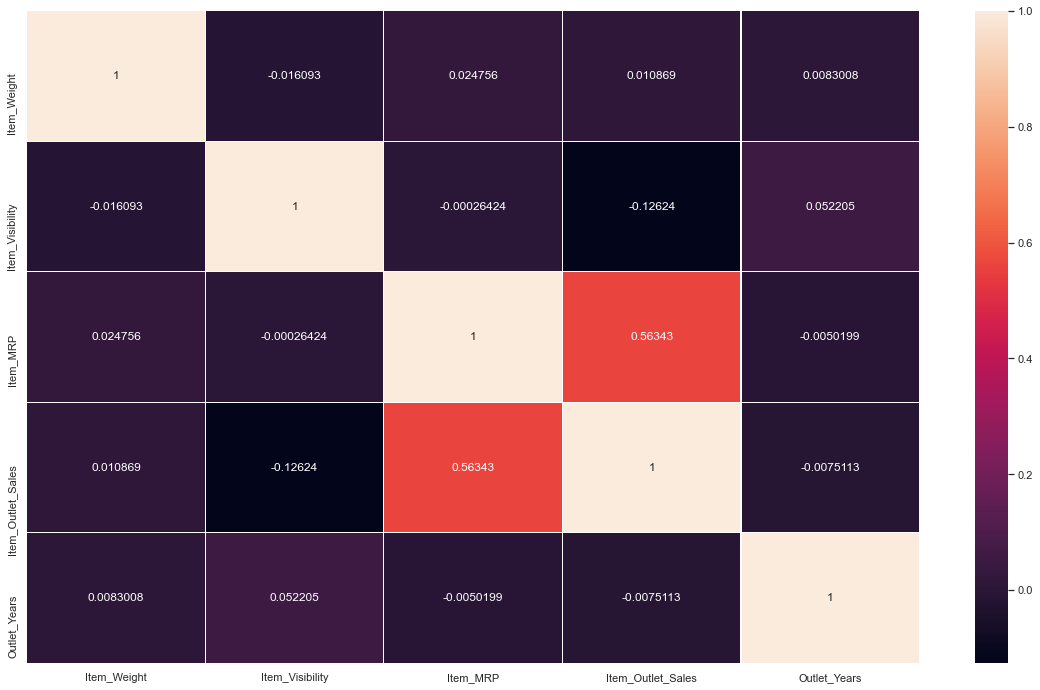

In [164]:
#plotting correlation table
plt.figure(figsize = [20,12])
sns.heatmap(BDM_train.corr(), annot = True,linewidths=0.1,fmt = '.5g' )
plt.show()

## Data Cleaning

In [28]:
#Checking for null Values to treat them

print("Checking for missing values :\n \n",BDM_train.isna().sum())
print("\nMissing values in percentage: \n",BDM_train.isnull().sum()/BDM_train.shape[0]*100)
#show values in percentage

Checking for missing values :
 
 Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Missing values in percentage: 
 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


<AxesSubplot:>

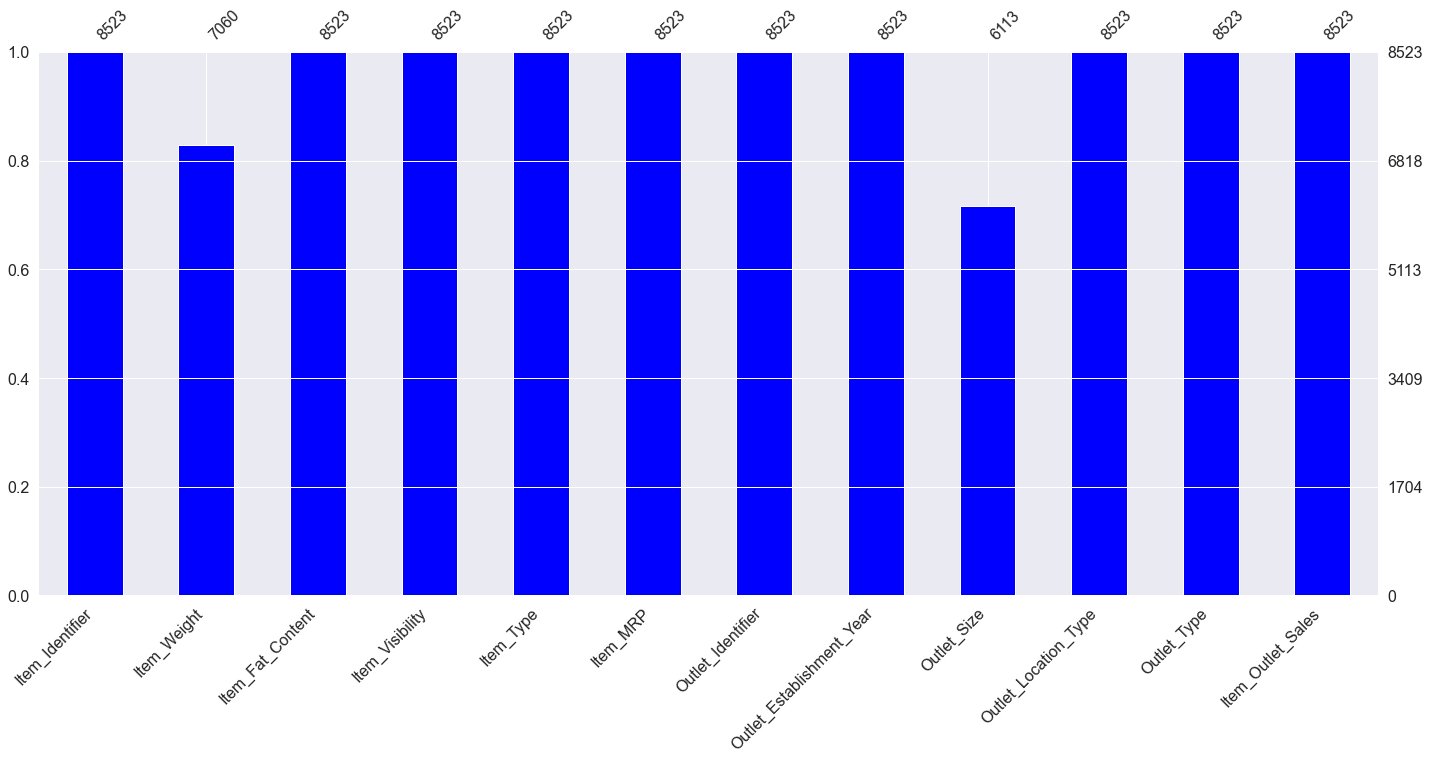

In [29]:
#Visualizing missing values

msno.bar(BDM_train,color = 'blue')

In [30]:
#Replacing missing values in Item_Weight with mean value of Item_Weight.
BDM_train['Item_Weight'] = BDM_train['Item_Weight'].fillna(BDM_train['Item_Weight'].mean())
BDM_train['Item_Weight'].isna().sum()

0

In [31]:
#Most occured value in outlet size
BDM_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [32]:
#Replacing NaNs in Outlet_Size with the mode

BDM_train['Outlet_Size'] = BDM_train['Outlet_Size'].fillna('Medium')
BDM_train['Outlet_Size'].isna().sum()

0

In [33]:
#Checking Nulls after treating them
BDM_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Feature Engineering

__Item_Visibility__ - minimum value in this column is zero which is practically not possible.  Any item that is selling will have visiblity to its customers. So We replace 0 values with mean of Item_Visiblity 

In [34]:
#Retreiving location of elements where Item_Visiblity is zero
np.where(BDM_train['Item_Visibility'] == 0)

(array([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,  107,
         114,  144,  156,  175,  212,  214,  216,  219,  228,  307,  349,
         370,  379,  386,  388,  411,  423,  447,  472,  478,  482,  499,
         500,  505,  520,  535,  545,  559,  576,  596,  600,  602,  613,
         623,  633,  651,  677,  687,  722,  737,  741,  747,  781,  791,
         792,  801,  802,  838,  840,  844,  900,  906,  943,  955,  968,
        1063, 1074, 1094, 1113, 1118, 1120, 1143, 1145, 1146, 1179, 1197,
        1212, 1243, 1263, 1292, 1326, 1335, 1346, 1350, 1351, 1390, 1391,
        1405, 1418, 1450, 1454, 1463, 1467, 1472, 1483, 1486, 1505, 1508,
        1511, 1537, 1585, 1623, 1633, 1636, 1643, 1649, 1665, 1691, 1693,
        1727, 1758, 1760, 1761, 1768, 1782, 1809, 1851, 1862, 1893, 1898,
        1913, 1953, 1972, 2007, 2018, 2022, 2053, 2055, 2062, 2138, 2192,
        2217, 2249, 2330, 2331, 2340, 2347, 2376, 2381, 2394, 2397, 2469,
        2484, 2521, 2522, 2545, 2547, 

In [35]:
#Finding median 
median = BDM_train['Item_Visibility'].median()
median

0.05393093400000001

In [36]:
#Replacing zero values with median
(BDM_train['Item_Visibility']).replace(0,median, inplace = True)

In [37]:
#Checking if all the location got Replaced
np.where(BDM_train['Item_Visibility'] == 0.05393093400000001)

(array([   3,    4,    5,   10,   32,   33,   46,   60,   72,   79,  107,
         114,  144,  156,  175,  212,  214,  216,  219,  228,  307,  349,
         370,  379,  386,  388,  411,  423,  447,  472,  478,  482,  499,
         500,  505,  520,  535,  545,  559,  576,  596,  600,  602,  613,
         623,  633,  651,  677,  687,  722,  737,  741,  747,  781,  791,
         792,  801,  802,  838,  840,  844,  900,  906,  943,  955,  968,
        1063, 1074, 1094, 1113, 1118, 1120, 1143, 1145, 1146, 1179, 1197,
        1212, 1243, 1263, 1292, 1326, 1335, 1346, 1350, 1351, 1390, 1391,
        1405, 1418, 1450, 1454, 1463, 1467, 1472, 1483, 1486, 1505, 1508,
        1511, 1537, 1585, 1623, 1633, 1636, 1643, 1649, 1665, 1691, 1693,
        1727, 1758, 1760, 1761, 1768, 1782, 1809, 1851, 1862, 1893, 1898,
        1913, 1953, 1972, 2007, 2018, 2022, 2053, 2055, 2062, 2138, 2192,
        2217, 2249, 2330, 2331, 2340, 2347, 2376, 2381, 2394, 2397, 2469,
        2484, 2521, 2522, 2545, 2547, 

In [38]:
#Checking zero Values
np.where(BDM_train['Item_Visibility'] == 0)

(array([], dtype=int64),)

__Item_Type__ : We have 16 types of items which can be grouped into three: Food, Drinks and Non Consumables.

In [39]:
#Checking categories and their value counts
BDM_train['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [40]:
#Subgrouping of Categories

In [41]:
BDM_train['Item_Type'].replace(to_replace = [['Fruits and Vegetables','Snack Foods','Frozen Foods', 'Dairy', 'Canned','Baking Goods','Meat','Breads','Starchy Foods','Breakfast','Seafood']], value = "Food", inplace = True)
BDM_train['Item_Type'].replace(to_replace = [['Soft Drinks','Hard Drinks']], value = "Drinks", inplace = True)
BDM_train['Item_Type'].replace(to_replace = [['Household','Health and Hygiene','Others']], value = "Non-Consumables", inplace = True)

In [42]:
#Checkning new value counts of categories
BDM_train['Item_Type'].value_counts()

Food               6265
Non-Consumables    1599
Drinks              659
Name: Item_Type, dtype: int64

__Item_Fat_Content__ : We have 5 categories in this column but it looks like some of the categories have been repeated.

In [43]:
#Checking value counts in Item_Fat_Content
BDM_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [44]:
#Replacing New categories by grouping old categories 

BDM_train['Item_Fat_Content'].replace(to_replace = ['Low Fat','LF','low fat'], value = "Low Fat", inplace = True)
BDM_train['Item_Fat_Content'].replace(to_replace = ['Regular','reg'], value = "Regular Fat", inplace = True)


In [45]:
#Checking value counts of new categories in Item_Fat_Content

BDM_train['Item_Fat_Content'].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

__Outlet_Establishment_Years__ -  Outlet Establishmet years can be transformed into total number of working years by subtracting it by 2013. Since we have data provided till 2013.

In [46]:
#New feature which marks number of working years
BDM_train['Outlet_Years'] = 2013 - BDM_train['Outlet_Establishment_Year']
BDM_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
0,FDA15,9.300,Low Fat,0.016047,Food,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.920,Regular Fat,0.019278,Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.500,Low Fat,0.016760,Food,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.200,Regular Fat,0.053931,Food,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.930,Low Fat,0.053931,Non-Consumables,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Food,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,26
8519,FDS36,8.380,Regular Fat,0.046982,Food,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,11
8520,NCJ29,10.600,Low Fat,0.035186,Non-Consumables,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,9
8521,FDN46,7.210,Regular Fat,0.145221,Food,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


<AxesSubplot:xlabel='Outlet_Years', ylabel='Item_Outlet_Sales'>

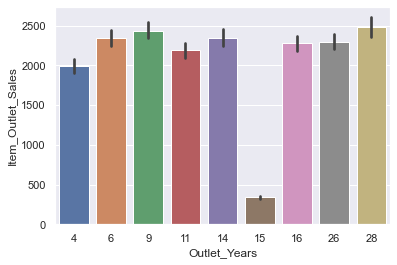

In [47]:
#Bivariate Anlysis
sns.barplot(data = BDM_train, x = 'Outlet_Years', y = 'Item_Outlet_Sales')
#we can clearly see that the outlets with 26 years of Working produces more sales. 

In [48]:
#Checking for Skewness 
BDM_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.318943
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
Outlet_Years                 0.396641
dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

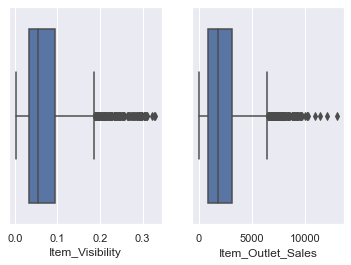

In [49]:
#Visualizing outliers using boxplot

fig, ax = plt.subplots(1,2)
sns.boxplot(BDM_train['Item_Visibility'], ax =ax[0])
sns.boxplot(BDM_train['Item_Outlet_Sales'],ax = ax[1])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

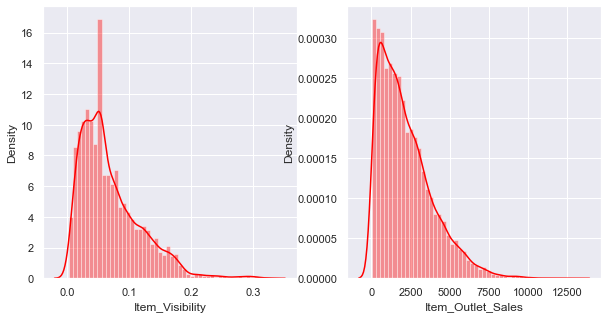

In [50]:
#Visualising Skewness using Distribution plot

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.distplot(BDM_train['Item_Visibility'], color = 'Red', ax = ax[0])
sns.distplot(BDM_train['Item_Outlet_Sales'], color = 'Red', ax = ax[1])
 
#Data is rightly skewed

In [51]:
#Removing skewness using log transformation 

BDM_train['Item_Visibility'] = np.log(BDM_train['Item_Visibility'])
BDM_train['Item_Visibility'].skew()

-0.43974051405315173

In [52]:
#Removing skewness using sqrt transformation 

BDM_train['Item_Outlet_Sales'] = np.sqrt(BDM_train['Item_Outlet_Sales'])
BDM_train['Item_Outlet_Sales'].skew()

0.23467599347099247

<AxesSubplot:xlabel='Item_Outlet_Sales'>

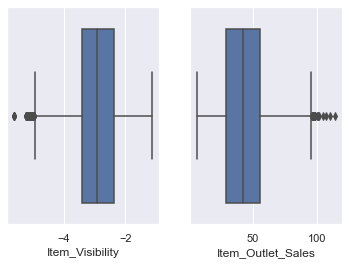

In [53]:
#Visualizing after removing skewness
fig, ax = plt.subplots(1,2)
sns.boxplot(BDM_train['Item_Visibility'], ax =ax[0])
sns.boxplot(BDM_train['Item_Outlet_Sales'],ax = ax[1])


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

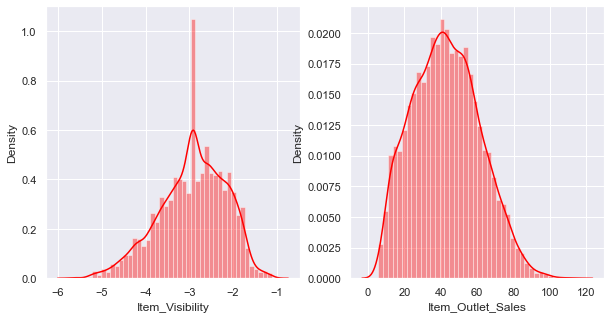

In [54]:
#Visualising distribution after skewness removal

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.distplot(BDM_train['Item_Visibility'], color = 'Red', ax = ax[0])
sns.distplot(BDM_train['Item_Outlet_Sales'], color = 'Red', ax = ax[1])


__Outlet_Identifier__ : Deriving new column "Outlets" for Simplicity of reading.

In [55]:
#Replacing new categories and placing it in a new column
BDM_train['Outlets'] = BDM_train['Outlet_Identifier'].replace({'OUT010' : 'Outlet_1', 'OUT013': 'Outlet_2', 'OUT017' : 'Outlet_3', 
                                                               'OUT018': 'Outlet_4','OUT019': 'Outlet_5', 'OUT027': 'Outlet_6',
                                                               'OUT035': 'Outlet_7', 'OUT045': 'Outlet_8','OUT046' : 'Outlet_9',
                                                               'OUT049' : 'Outlet_10'})

Dropping Nominal Columns 

In [56]:
BDM_train.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [57]:
#Using dummy variable for all our categorical features and making our Dataset ready for model implementation

train = pd.get_dummies(BDM_train)
train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumables,...,Outlets_Outlet_1,Outlets_Outlet_10,Outlets_Outlet_2,Outlets_Outlet_3,Outlets_Outlet_4,Outlets_Outlet_5,Outlets_Outlet_6,Outlets_Outlet_7,Outlets_Outlet_8,Outlets_Outlet_9
0,9.300,-4.132215,249.8092,61.115775,14,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,5.920,-3.948780,48.2692,21.057607,4,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,17.500,-4.088756,141.6180,45.795961,14,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,19.200,-2.920051,182.0950,27.062520,15,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,-2.920051,53.8614,31.538947,26,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,52.710373,26,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,-3.057982,108.1570,23.436830,11,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
8520,10.600,-3.347099,85.1224,34.541477,9,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,-1.929501,103.1332,42.960419,4,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### Test Data 

In [58]:
#Loading Test dataset
BDM_test = pd.read_csv("bigdatamart_Test.csv")
BDM_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [59]:
print("Shape of the test dataset is :", BDM_test.shape)

Shape of the test dataset is : (5681, 11)


In [60]:
#Checking datatypes of test dataset 
BDM_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [61]:
#Statistical analysis
BDM_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


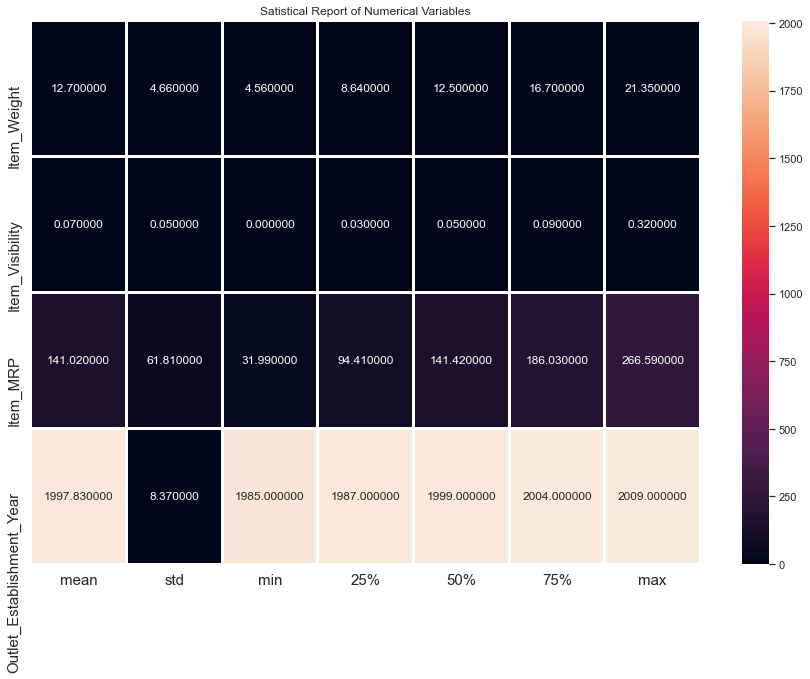

In [62]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(BDM_test.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Satistical Report of Numerical Variables")
plt.show()

- Item Weight : 
    - mean = 12.86
    - std = 4.23
    - max = 21.35
    - min = 4.56
    
- Item Visiblity : 
    - mean = -2.93
    - std = 0.76
    - max = -1.11
    - min = -5.63
    
- Item MRP : 
    - mean = 140.99
    - std = 62.28
    - max = 266.89
    - min = 31.29
    
- Outlet_Establishment_Year : 
    - mean = 1987
    - std = 8.37
    - max = 2009
    - min = 1985


In [63]:
#Checking for Duplicated Values
BDM_test.duplicated().sum()

0

<AxesSubplot:>

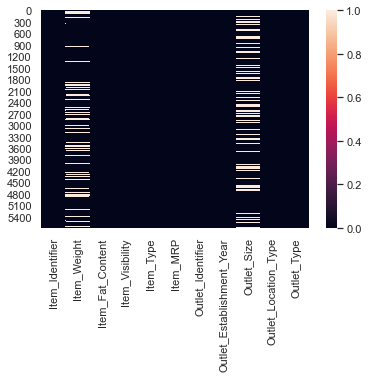

In [64]:
#Visualizing null Values
sns.heatmap(BDM_test.isnull())

#### Univariate analysis of Categorical Features

In [65]:
#Checking Data Types
BDM_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

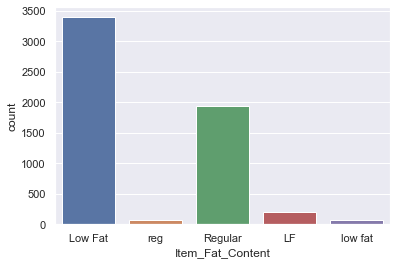

In [66]:
sns.countplot(BDM_test['Item_Fat_Content'])
# 5 Categories in Item_Fat_content which seems to be repeated

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Snack Foods'),
  Text(1, 0, 'Dairy'),
  Text(2, 0, 'Others'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Baking Goods'),
  Text(5, 0, 'Health and Hygiene'),
  Text(6, 0, 'Breads'),
  Text(7, 0, 'Hard Drinks'),
  Text(8, 0, 'Seafood'),
  Text(9, 0, 'Soft Drinks'),
  Text(10, 0, 'Household'),
  Text(11, 0, 'Frozen Foods'),
  Text(12, 0, 'Meat'),
  Text(13, 0, 'Canned'),
  Text(14, 0, 'Starchy Foods'),
  Text(15, 0, 'Breakfast')])

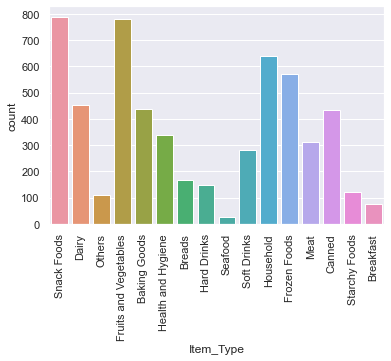

In [67]:
sns.countplot(BDM_test['Item_Type'])
plt.xticks(rotation = 90)

#It looks like we have 16 categories in this column.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT017'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT027'),
  Text(4, 0, 'OUT046'),
  Text(5, 0, 'OUT018'),
  Text(6, 0, 'OUT045'),
  Text(7, 0, 'OUT019'),
  Text(8, 0, 'OUT013'),
  Text(9, 0, 'OUT035')])

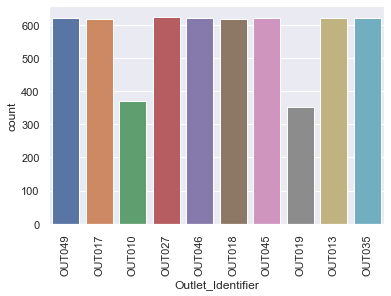

In [68]:
sns.countplot(BDM_test['Outlet_Identifier'])
plt.xticks(rotation = 90)

#10 Categories in outlet identifier

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'Small'), Text(2, 0, 'High')])

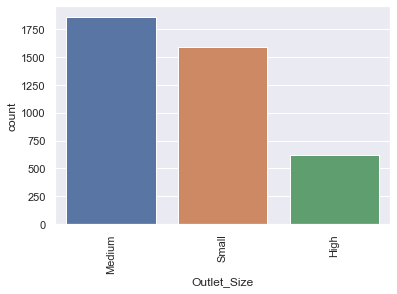

In [69]:
sns.countplot(BDM_test['Outlet_Size'])
plt.xticks(rotation = 90)

#It looks like we have 3 categories in this column

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type3'),
  Text(3, 0, 'Supermarket Type2')])

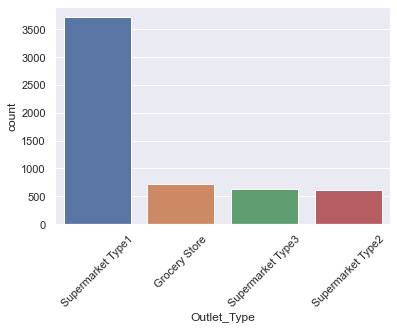

In [70]:
sns.countplot(BDM_test['Outlet_Type'])
plt.xticks(rotation = 45)

#It looks like we have 4 categories in this column

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

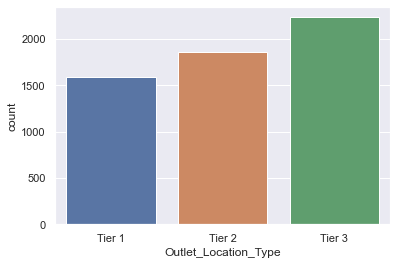

In [71]:
sns.countplot(BDM_test['Outlet_Location_Type'])

#It looks like we have 3 categories in this column

#### Multivariate analysis 

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

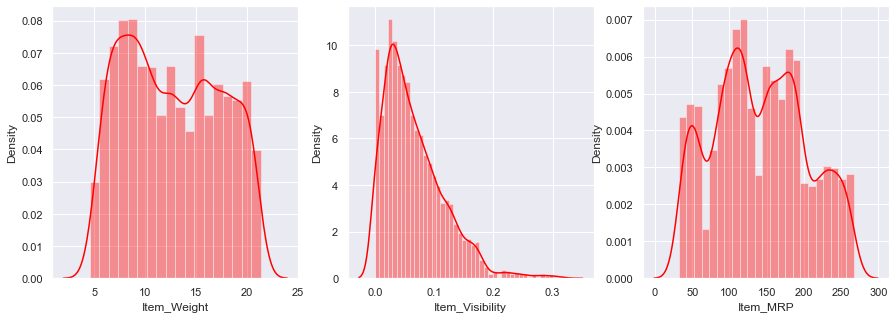

In [72]:
#Visualizing data distribution of numerical Datatype variables. 

fig,ax = plt.subplots(1,3, figsize = (15,5))

sns.distplot(BDM_test['Item_Weight'], color = 'Red', ax = ax[0])
sns.distplot(BDM_test['Item_Visibility'], color = 'Red',ax = ax[1])
sns.distplot(BDM_test['Item_MRP'], color = 'Red', ax = ax[2])


### Data Cleaning

In [73]:
#Checking for skewness
BDM_test.skew()

Item_Weight                  0.129975
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

<AxesSubplot:xlabel='Item_Visibility'>

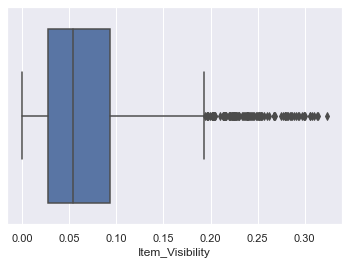

In [74]:
#Removing Skewness from ITem_visiblity column
sns.boxplot(BDM_test['Item_Visibility'])

In [75]:
#performing sqrt tranformation to remove skewness
BDM_test['Item_Visibility'] = np.sqrt(BDM_test['Item_Visibility'])
BDM_test['Item_Visibility'].skew()

-0.09494120775734813

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

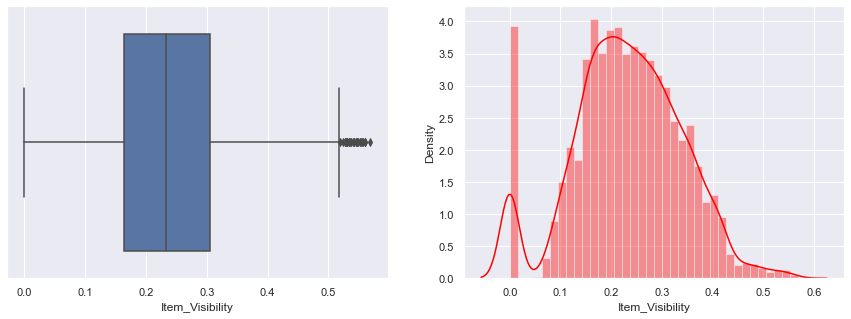

In [76]:
#Visualising After removing skewness 
fig,ax = plt.subplots(1,2, figsize = (15,5))

sns.boxplot(BDM_test['Item_Visibility'], ax = ax[0])
sns.distplot(BDM_test['Item_Visibility'], color = 'Red', ax = ax[1])


In [77]:
#Checking for null values
print("Checking for missing values :\n \n",BDM_test.isna().sum())
print("\nMissing values in percentage: \n",BDM_test.isnull().sum()/BDM_train.shape[0]*100)
#show values in percentage

Checking for missing values :
 
 Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Missing values in percentage: 
 Item_Identifier               0.000000
Item_Weight                  11.451367
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  18.843130
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64


<AxesSubplot:>

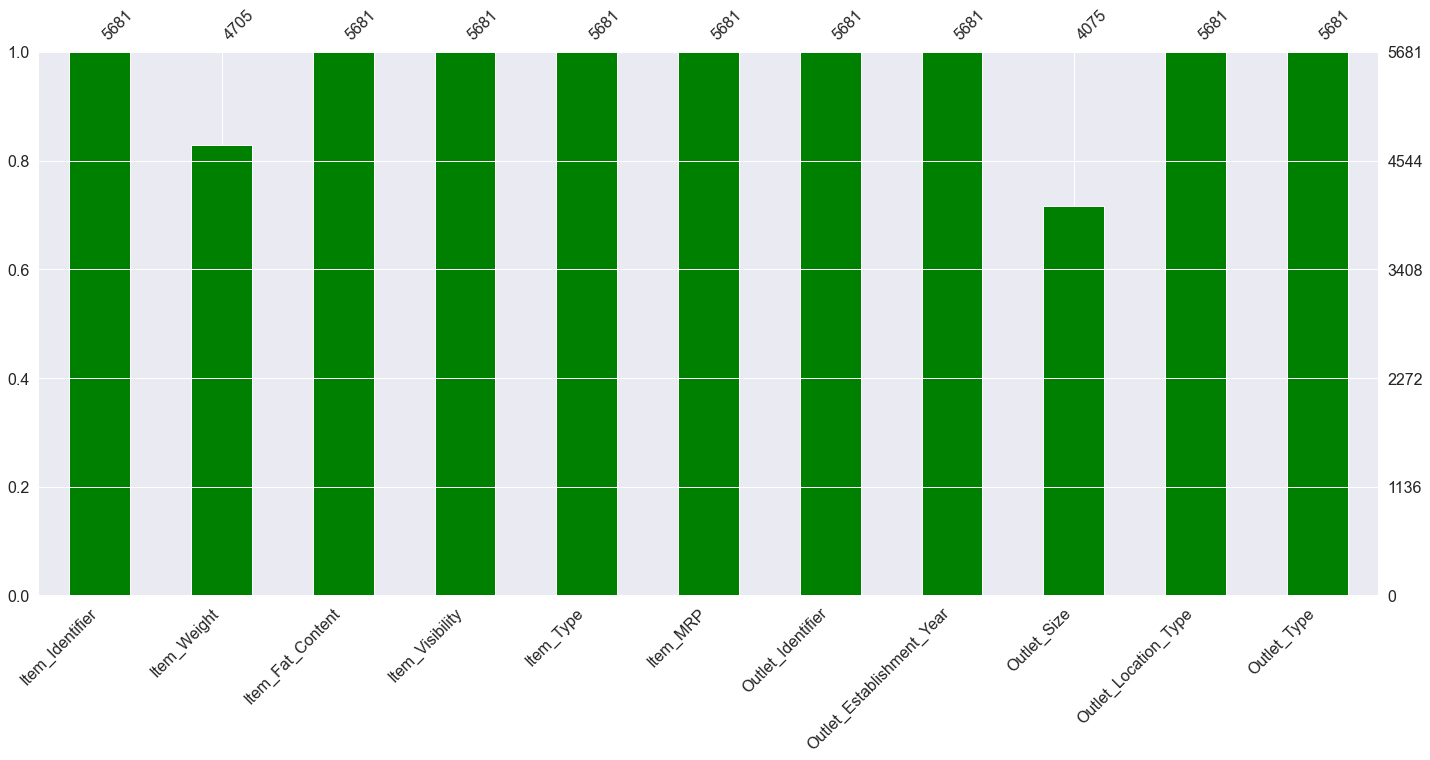

In [78]:
#Visualising null values
msno.bar(BDM_test,color = 'green')

In [79]:
#Replacing missing values of ITem_weight by mean value of the column
BDM_test['Item_Weight'] = BDM_test['Item_Weight'].fillna(BDM_test['Item_Weight'].mean())
BDM_test['Item_Weight'].isna().sum()

0

In [80]:
#Identifying mode 
BDM_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [81]:
#Replacing Null values with mode 
BDM_test['Outlet_Size'] = BDM_test['Outlet_Size'].fillna('Medium')
BDM_test['Outlet_Size'].isna().sum()

0

In [82]:
#Checking null values after treating them
BDM_test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Feature Engineering

__Item_Visibility__ - minimum value in this column is zero which is practically not possible.  Any item that is selling will have visiblity to its customers. So We replace 0 values with mean of Item_Visiblity 

In [83]:
#Retreiving location of elements where Item_Visiblity is zero

np.where(BDM_test['Item_Visibility'] == 0)

(array([  56,   90,  109,  125,  140,  150,  168,  185,  222,  230,  239,
         244,  264,  280,  289,  306,  318,  327,  343,  369,  397,  416,
         441,  459,  462,  470,  479,  530,  547,  549,  563,  569,  570,
         577,  621,  631,  648,  649,  652,  656,  691,  720,  732,  755,
         795,  827,  850,  857,  885,  901,  906,  954,  990, 1001, 1011,
        1078, 1088, 1101, 1123, 1133, 1136, 1149, 1167, 1184, 1200, 1210,
        1230, 1274, 1278, 1295, 1311, 1313, 1325, 1345, 1348, 1357, 1372,
        1373, 1396, 1434, 1455, 1458, 1486, 1553, 1557, 1565, 1569, 1578,
        1595, 1615, 1631, 1634, 1653, 1665, 1698, 1750, 1770, 1774, 1787,
        1789, 1797, 1798, 1806, 1807, 1811, 1813, 1814, 1831, 1853, 1888,
        1892, 1893, 1947, 1948, 1951, 1964, 1984, 2000, 2022, 2034, 2077,
        2080, 2091, 2096, 2100, 2111, 2145, 2162, 2169, 2185, 2201, 2207,
        2210, 2219, 2227, 2256, 2288, 2289, 2310, 2312, 2348, 2407, 2414,
        2457, 2490, 2498, 2529, 2551, 

In [84]:
#Finding median 

median = BDM_test['Item_Visibility'].median()
median

0.23271066155206555

In [85]:
#Replacing zero values with median

(BDM_test['Item_Visibility']).replace(0,median, inplace = True)

In [86]:
#Checking zero Values

np.where(BDM_test['Item_Visibility'] == 0)

(array([], dtype=int64),)

__Item_Type__ : We have 16 types of items which can be grouped into three: Food, Drinks and Non Consumables.

In [87]:
#Checking categories and their value counts

BDM_test['Item_Type'].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [88]:
#Subgrouping of Categories

BDM_test['Item_Type'].replace(to_replace = [['Fruits and Vegetables','Snack Foods','Frozen Foods', 'Dairy', 'Canned','Baking Goods','Meat','Breads','Starchy Foods','Breakfast','Seafood']], value = "Food", inplace = True)
BDM_test['Item_Type'].replace(to_replace = [['Soft Drinks','Hard Drinks']], value = "Drinks", inplace = True)
BDM_test['Item_Type'].replace(to_replace = [['Household','Health and Hygiene','Others']], value = "Non-Consumables", inplace = True)

In [89]:
#Checkning new value counts of categories

BDM_test['Item_Type'].value_counts()

Food               4165
Non-Consumables    1087
Drinks              429
Name: Item_Type, dtype: int64

__Item_Fat_Content__ : We have 5 categories in this column but it looks like some of the categories have been repeated.

In [90]:
#Checking value counts in Item_Fat_Content

BDM_test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [91]:
#Replacing New categories by grouping old categories 

BDM_test['Item_Fat_Content'].replace(to_replace = ['Low Fat','LF','low fat'], value = "Low Fat", inplace = True)
BDM_test['Item_Fat_Content'].replace(to_replace = ['Regular','reg'], value = "Regular Fat", inplace = True)


In [92]:
#Checking value counts of new categories in Item_Fat_Content

BDM_test['Item_Fat_Content'].value_counts()

Low Fat        3668
Regular Fat    2013
Name: Item_Fat_Content, dtype: int64

__Outlet_Establishment_Years__ -  Outlet Establishmet years can be transformed into total number of working years by subtracting it by 2013. Since we have data provided till 2013.

In [93]:
#New feature which marks number of working years

BDM_test['Outlet_Years'] = 2013 - BDM_test['Outlet_Establishment_Year']
BDM_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Years
0,FDW58,20.750000,Low Fat,0.086976,Food,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14
1,FDW14,8.300000,Regular Fat,0.196030,Food,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
2,NCN55,14.600000,Low Fat,0.315555,Non-Consumables,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15
3,FDQ58,7.315000,Low Fat,0.124050,Food,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6
4,FDY38,12.695633,Regular Fat,0.344383,Food,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28


<AxesSubplot:xlabel='Outlet_Years', ylabel='count'>

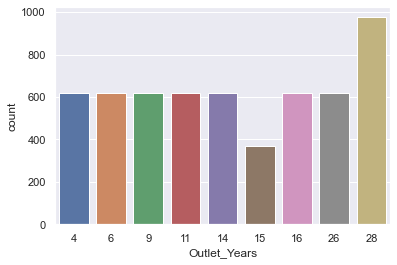

In [94]:
#Bivariate Anlysis

sns.countplot(BDM_test['Outlet_Years'])
#we can clearly see that the outlets with 26 years of Working produces more sales. 

__Outlet_Identifier__ : Deriving new column "Outlets" for Simplicity of reading.

In [95]:
BDM_test['Outlets'] = BDM_test['Outlet_Identifier'].replace({'OUT010' : 'Outlet_1', 'OUT013': 'Outlet_2', 'OUT017' : 'Outlet_3', 
                                                               'OUT018': 'Outlet_4','OUT019': 'Outlet_5', 'OUT027': 'Outlet_6',
                                                               'OUT035': 'Outlet_7', 'OUT045': 'Outlet_8','OUT046' : 'Outlet_9',
                                                               'OUT049' : 'Outlet_10'})

In [96]:
#Dropping Nominal Columns 
BDM_test.drop(columns = ['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis = 1, inplace = True)

In [97]:
#Using dummy variable for all our categorical features and making our Dataset ready for model implementation

test = pd.get_dummies(BDM_test)

In [98]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular Fat,Item_Type_Drinks,Item_Type_Food,Item_Type_Non-Consumables,Outlet_Size_High,...,Outlets_Outlet_1,Outlets_Outlet_10,Outlets_Outlet_2,Outlets_Outlet_3,Outlets_Outlet_4,Outlets_Outlet_5,Outlets_Outlet_6,Outlets_Outlet_7,Outlets_Outlet_8,Outlets_Outlet_9
0,20.750000,0.086976,107.8622,14,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8.300000,0.196030,87.3198,6,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,14.600000,0.315555,241.7538,15,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.124050,155.0340,6,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,12.695633,0.344383,234.2300,28,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.116174,141.3154,16,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5677,7.600000,0.378141,169.1448,4,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
5678,10.000000,0.271162,118.7440,11,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5679,15.300000,0.232711,214.6218,6,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular Fat', 'Item_Type_Drinks', 'Item_Type_Food',
       'Item_Type_Non-Consumables', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Outlets_Outlet_1', 'Outlets_Outlet_10', 'Outlets_Outlet_2',
       'Outlets_Outlet_3', 'Outlets_Outlet_4', 'Outlets_Outlet_5',
       'Outlets_Outlet_6', 'Outlets_Outlet_7', 'Outlets_Outlet_8',
       'Outlets_Outlet_9'],
      dtype='object')

In [100]:
test.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Years',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular Fat',
       'Item_Type_Drinks', 'Item_Type_Food', 'Item_Type_Non-Consumables',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Outlets_Outlet_1',
       'Outlets_Outlet_10', 'Outlets_Outlet_2', 'Outlets_Outlet_3',
       'Outlets_Outlet_4', 'Outlets_Outlet_5', 'Outlets_Outlet_6',
       'Outlets_Outlet_7', 'Outlets_Outlet_8', 'Outlets_Outlet_9'],
      dtype='object')

# Model Building on Train Dataset

In [101]:
#Splitting Dataset into Label and Features
X = train.drop('Item_Outlet_Sales', axis = 1)
y = train['Item_Outlet_Sales']

In [102]:
#Using Train_test_Split for splitting training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25)

### Linear Regression Model

In [103]:
#Model Instantiating and Fitting

lm = LinearRegression()

lm.fit(X_train,y_train)

LinearRegression()

In [104]:
#Printing model confidence on training set and testing set
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_train,y_train)*100,2),'%')
print("Linear Regression Model Confidence on training set : ",round(lm.score(X_test,y_test)*100,2),'%')

Linear Regression Model Confidence on training set :  65.16 %
Linear Regression Model Confidence on training set :  66.97 %


In [105]:
#Performing Model Predictions on X_test
y_pred = lm.predict(X_test)

In [106]:
#printing Intercept and weights our Linear Regression Model
print("Intercept for Linear Regression Model is : ",lm.intercept_,'\n')
weights = zip(X.columns,lm.coef_)
weights = pd.DataFrame(list(weights), columns = ['features', 'coefficients'])
print("Features and their corresponding weights:")
weights

Intercept for Linear Regression Model is :  13.715554579102218 

Features and their corresponding weights:


,features,coefficients
0,Item_Weight,-0.002449
1,Item_Visibility,-0.214980
2,Item_MRP,0.165080
3,Outlet_Years,0.095261
4,Item_Fat_Content_Low Fat,-0.160851
5,Item_Fat_Content_Regular Fat,0.160851
6,Item_Type_Drinks,0.028722
7,Item_Type_Food,0.127457
8,Item_Type_Non-Consumables,-0.156179
9,Outlet_Size_High,-0.293992


In [107]:
#Applying Evaluation metrics to our Regression model
print('R squared for our Linear Regression Model:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Linear Regression Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Linear Regression Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Linear Regression Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R squared for our Linear Regression Model: 0.6696649333546241
Mean Absolute Error for our Linear Regression Model: 8.216092337767128
Mean Squared Error for our Linear Regression Model: 110.83723750829296
Root Mean Squared Error for our Linear Regression Model: 10.527926553139178


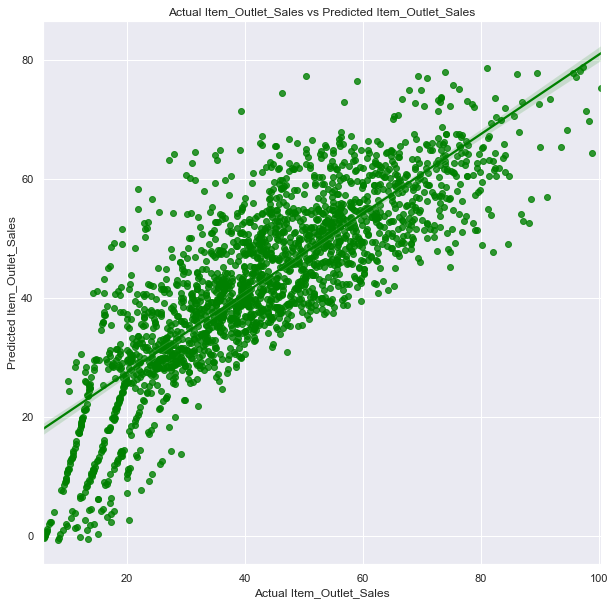

In [108]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=y_pred,data=X, color = 'green')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

In [109]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(lm,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 65.4 %


### Decision Tree Regressor

In [110]:
#Instantiating model
dt = DecisionTreeRegressor()

In [111]:
#Fitting model
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [112]:
#predicting X_test
y_pred = dt.predict(X_test)

In [113]:
#Applying Evaluation metrics to our Decision Tree Regressor model
print('R2 Score for Decision Tree Regressor:', r2_score(y_test,y_pred))
print('Mean Absolute Error for our Decision Tree Regressor Model:',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error for our Decision Tree Regressor Model:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error for our Decision Tree Regressor Model:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score for Decision Tree Regressor: 0.32793935257568063
Mean Absolute Error for our Decision Tree Regressor Model: 11.362534224667028
Mean Squared Error for our Decision Tree Regressor Model: 225.49633121001
Root Mean Squared Error for our Decision Tree Regressor Model: 15.016535259839735


In [114]:
#Getting Cross-val-score to check the difference in model confidence and cross-val-score
score = cross_val_score(dt,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 32.0 %


### Partial Least Squares 

In [115]:
#Instantiating model

PLS = PLSRegression()

In [116]:
#fitting our training dataset

PLS.fit(X_train,y_train)

PLSRegression()

In [117]:
print("Model Confidence on training Dataset: ",PLS.score(X_train,y_train)*100,'%')
print("Model Confidence on test Dataset:",PLS.score(X_test,y_test)*100,'%')

Model Confidence on training Dataset:  63.26154288267467 %
Model Confidence on test Dataset: 65.10853950571351 %


In [118]:
#predictin X-test
PLSpred = PLS.predict(X_test)

In [119]:
#Applying Evaluation metrics to our PLS Regression model
print('R2 Score for PLS Regression Model:', r2_score(y_test,PLSpred))
print('Mean Absolute Error for our PLS Regression Model:',mean_absolute_error(y_test,PLSpred))
print('Mean Squared Error for our PLS Regression Model:',mean_squared_error(y_test,PLSpred))
print('Root Mean Squared Error for our PLS Regression Model:',np.sqrt(mean_squared_error(y_test,PLSpred)))

R2 Score for PLS Regression Model: 0.6510853950571351
Mean Absolute Error for our PLS Regression Model: 8.489499220274524
Mean Squared Error for our PLS Regression Model: 117.0712250772964
Root Mean Squared Error for our PLS Regression Model: 10.819945705838657


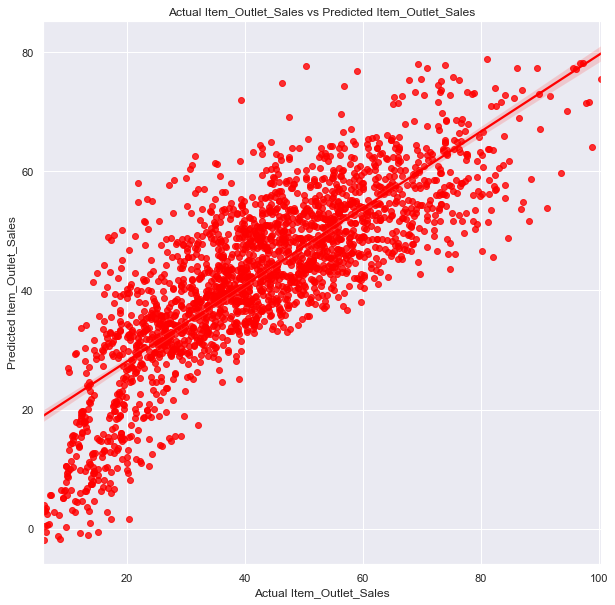

In [120]:
#Visualizing Regression Line of PLS model
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=PLSpred,data=X, color = 'red')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

In [121]:
score = cross_val_score(PLS,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 63.4 %


### Support Vector Regressor

In [122]:
#Model Instantiating and fitting
model = SVR()
model.fit(X_train,y_train)

SVR()

In [123]:
svrpred = model.predict(X_test)

In [124]:
#Applying Evaluation metrics to our PCA Regression model
print('R2 Score for Support Vector Regression Model:', r2_score(y_test,svrpred))
print('Mean Absolute Error for our Support Vector Regression Model:',mean_absolute_error(y_test,svrpred))
print('Mean Squared Error for our Support Vector Regression Model:',mean_squared_error(y_test,svrpred))
print('Root Mean Squared Error for our Support Vector Regression Model:',np.sqrt(mean_squared_error(y_test,svrpred)))

R2 Score for Support Vector Regression Model: 0.33173399594095565
Mean Absolute Error for our Support Vector Regression Model: 11.407283251616095
Mean Squared Error for our Support Vector Regression Model: 224.22311552568254
Root Mean Squared Error for our Support Vector Regression Model: 14.974081458496295


In [125]:
#Printing model confidence on training set and testing set
print("PCA Support Vector Regression Model Confidence on training set : ",round(model.score(X_train,y_train)*100,2),'%')
print("PCA Support Vector Regression Model Confidence on training set : ",round(model.score(X_test,y_test)*100,2),'%')

PCA Support Vector Regression Model Confidence on training set :  31.11 %
PCA Support Vector Regression Model Confidence on training set :  33.17 %


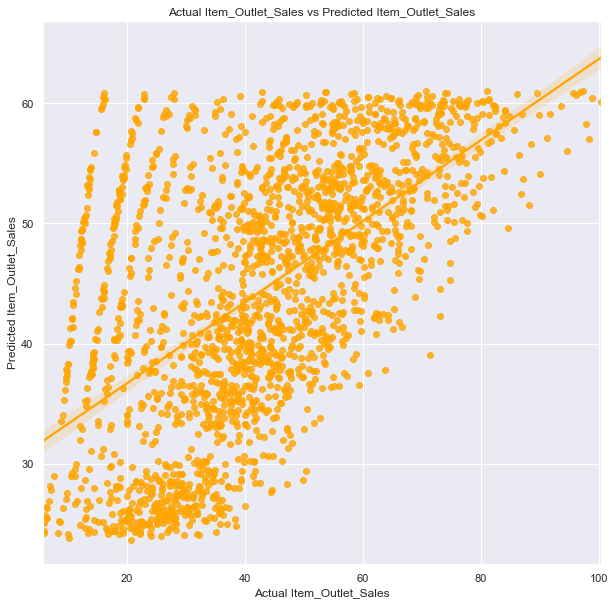

In [126]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=svrpred,data=X, color = 'orange')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

In [127]:
score = cross_val_score(model,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 31.5 %


### Xtreme Gradient Boosting Regressor

In [128]:
#Model instantiating
xgb_reg = xgb.XGBRegressor(objective ='reg:linear')

In [129]:
#Model Fitting
xgb_reg.fit(X_train,y_train)

[16:40:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [130]:
#model prediction 
xgbpred = model.predict(X_test)

In [131]:
#Applying Evaluation metrics to our XGB Regression model
print('R2 Score for XGB Regression Model:', r2_score(y_test,xgbpred))
print('Mean Absolute Error for our XGB Regression Model:',mean_absolute_error(y_test,xgbpred))
print('Mean Squared Error for our XGB Regression Model:',mean_squared_error(y_test,xgbpred))
print('Root Mean Squared Error for our XGB Regression Model:',np.sqrt(mean_squared_error(y_test,xgbpred)))

R2 Score for XGB Regression Model: 0.33173399594095565
Mean Absolute Error for our XGB Regression Model: 11.407283251616095
Mean Squared Error for our XGB Regression Model: 224.22311552568254
Root Mean Squared Error for our XGB Regression Model: 14.974081458496295


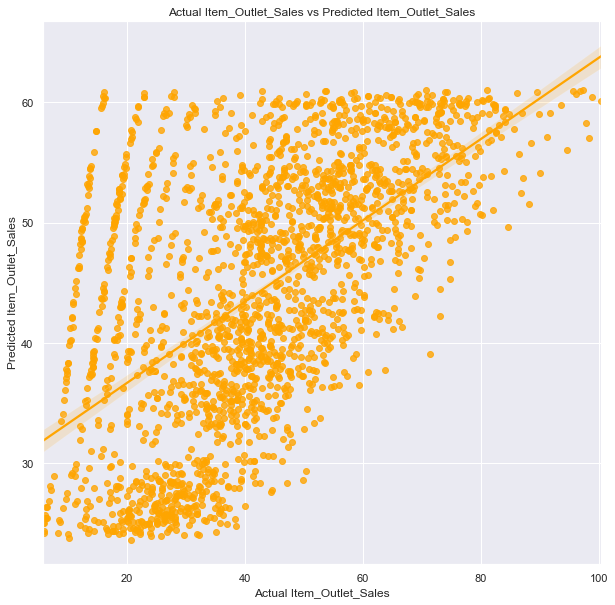

In [132]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=xgbpred,data=X, color = 'orange')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

### KNeighbors Regressor

In [133]:
#Model Instantiating
knn = KNeighborsRegressor(n_neighbors = 7)

In [134]:
#Model Fitting
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=7)

In [135]:
knnpred  = knn.predict(X_test)

In [136]:
#Applying Evaluation metrics to our KNN Regression model
print('R2 Score for KNN Regression Model:', r2_score(y_test,knnpred))
print('Mean Absolute Error for our KNN Regression Model:',mean_absolute_error(y_test,knnpred))
print('Mean Squared Error for our KNN Regression Model:',mean_squared_error(y_test,knnpred))
print('Root Mean Squared Error for our KNN Regression Model:',np.sqrt(mean_squared_error(y_test,knnpred)))

R2 Score for KNN Regression Model: 0.5732178208378387
Mean Absolute Error for our KNN Regression Model: 9.206064141206932
Mean Squared Error for our KNN Regression Model: 143.19811165214503
Root Mean Squared Error for our KNN Regression Model: 11.966541340426858


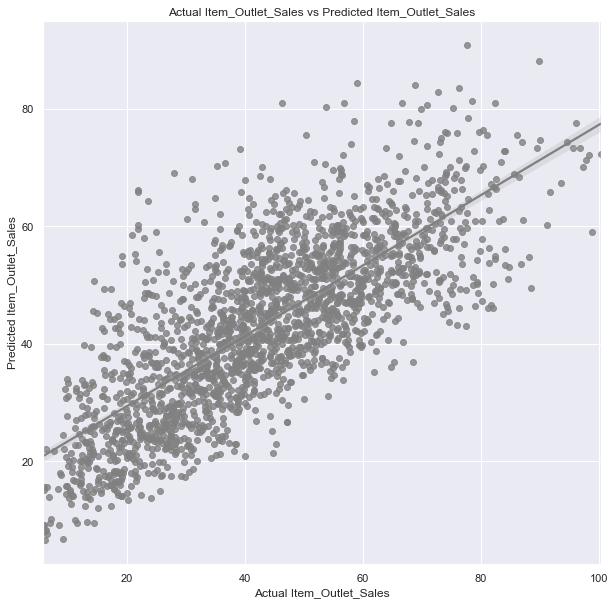

In [137]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=knnpred,data=X, color = 'grey')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

## Lasso Regularization

In [138]:
#LassoCV(lasso cross validation) will return the best alpha after max iterations
#normalizing is subtracting the mean and dividing by l2-norm
lasscv = LassoCV(alphas=None, max_iter=2000, normalize = True)
lasscv.fit(X_train,y_train)
alpha = lasscv.alpha_
alpha

0.0009705121032413563

In [139]:
#Now that we have best parameter, let's use lasso regression and see how well our data has fitted before
alpha = lasscv.alpha_

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0009705121032413563)

In [140]:
#Model Confidence After using Lasso Regression
print('Model Confidence After using Lasso Regularization Model: ',round(lasso_reg.score(X_test,y_test),3)*100, '%')

Model Confidence After using Lasso Regularization Model:  67.0 %


In [141]:
lassopred = lasso_reg.predict(X_test)

In [142]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,lassopred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,lassopred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,lassopred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,lassopred)))

R2 Score for Tuned Lasso Regression Model: 0.6696962621034178
Mean Absolute Error for our Tuned Lasso Regression Model: 8.21560217933832
Mean Squared Error for our Tuned Lasso Regression Model: 110.82672578149945
Root Mean Squared Error for our Lasso Linear Regression Model: 10.527427310672795


In [143]:
score = cross_val_score(lasso_reg,X,y, cv = 15)
print("Cross validation score is :", round(score.mean(),3)*100,'%')

Cross validation score is : 65.4 %


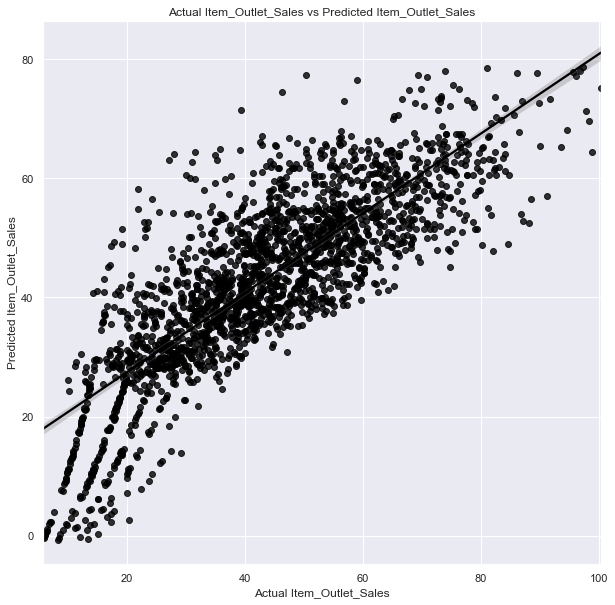

In [144]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=lassopred,data=X, color = 'black')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

## Ridge Regularization

In [145]:
#Ridge will return best alpha and coefficients after performing 10 cross validations
ridgecv = RidgeCV(alphas= np.arange(0.001,0.2,0.001),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.0...
       0.136, 0.137, 0.138, 0.139, 0.14 , 0.141, 0.142, 0.143, 0.144,
       0.145, 0.146, 0.147, 0.148, 0.149, 0.15 , 0.151, 0.152, 0.153,
       0.154, 0.155, 0.156, 0.157, 0.158, 0.159, 0.16 , 0.161, 0.162,
       0.163, 0.164, 0.165, 0.166, 0.167, 0.168, 0.169, 0.17 , 0.171,
       0.172, 0.173, 0.174, 0.175, 0.176, 0.177, 0.178, 0.179, 0.18 ,
       0.181, 0.182, 0.183, 0.184, 0.185, 0.186, 0.187, 0.188, 0.189,
       0.19 , 0.191, 0.192, 0.193, 0.194, 0.195, 0.196, 0.197, 0.198,
       0.199]),
        normalize=True)

In [146]:
ridgecv.alpha_

0.002

In [147]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.002)

In [148]:
ridgepred = ridge_model.predict(X_test)

In [149]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Ridge Regression Model:', r2_score(y_test,ridgepred))
print('Mean Absolute Error for our Tuned Ridge Regression Model:',mean_absolute_error(y_test,ridgepred))
print('Mean Squared Error for our Tuned Ridge Regression Model:',mean_squared_error(y_test,ridgepred))
print('Root Mean Squared Error for our Ridge Linear Regression Model:',np.sqrt(mean_squared_error(y_test,ridgepred)))

R2 Score for Tuned Ridge Regression Model: 0.6696649403126872
Mean Absolute Error for our Tuned Ridge Regression Model: 8.216091936108812
Mean Squared Error for our Tuned Ridge Regression Model: 110.83723517365587
Root Mean Squared Error for our Ridge Linear Regression Model: 10.527926442260881


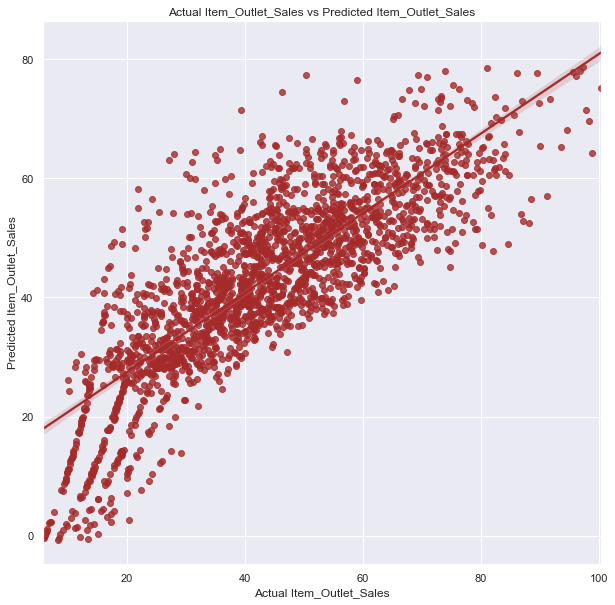

In [150]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=ridgepred,data=X, color = 'brown')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

__Conclusion__: From all the predictive models Lasso is giving us the best r2_Score and Cross_val_Score

### Hyperparameter Tuning of Lasso

In [151]:
#Using Randomized Search
param_grid = {'alpha': uniform()}

model = Lasso()
rand_search = RandomizedSearchCV(estimator=model, 
                            param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train,y_train)

print(rand_search.best_estimator_.alpha)
print(rand_search.best_score_)

0.023170088862257354
0.6487673332203668


In [152]:
pred = rand_search.predict(X_test)

In [153]:
#Applying Evaluation metrics to our Tuned Lasso Regression model
print('R2 Score for Tuned Lasso Regression Model:', r2_score(y_test,pred))
print('Mean Absolute Error for our Tuned Lasso Regression Model:',mean_absolute_error(y_test,pred))
print('Mean Squared Error for our Tuned Lasso Regression Model:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error for our Lasso Linear Regression Model:',np.sqrt(mean_squared_error(y_test,pred)))

R2 Score for Tuned Lasso Regression Model: 0.6702301501530997
Mean Absolute Error for our Tuned Lasso Regression Model: 8.206367203835276
Mean Squared Error for our Tuned Lasso Regression Model: 110.64759046545092
Root Mean Squared Error for our Lasso Linear Regression Model: 10.51891584078183


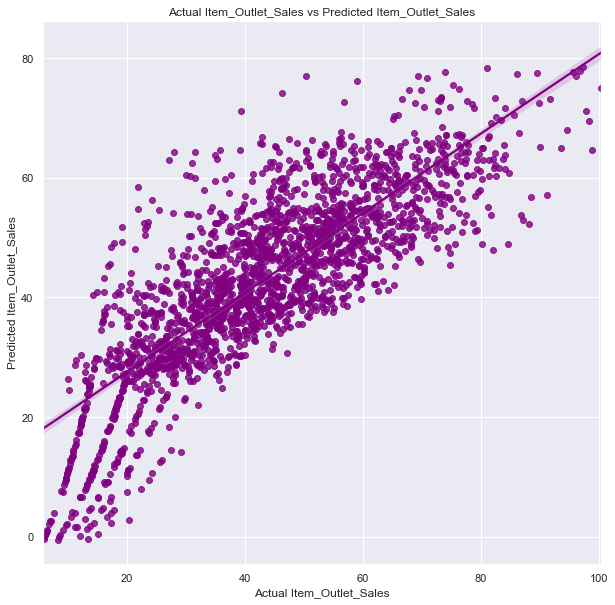

In [154]:
plt.figure(figsize = (10,10))
sns.regplot(x=y_test,y=pred,data=X, color = 'purple')
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual Item_Outlet_Sales vs Predicted Item_Outlet_Sales')
plt.show()

In [155]:
#Using Grid Search CV
alphas = np.array([5, 0.5, 0.05, 0.005, 0.0005, 1, 0.1, 0.01, 0.001, 0.0001, 0 ])

model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))

grid.fit(X_train, y_train)

print(grid.best_estimator_.alpha)
print(grid.best_score_)

0.01
0.6487435456080848


__Conclusion__ : Randomized Search CV tuned our lasso model well. So we will go further with saving it and predicting our BDM_test dataset.

### Saving Model

In [156]:
joblib.dump(rand_search,"BigDataMartAnalysis.pkl")

['BigDataMartAnalysis.pkl']

### Loading Saved Model

In [157]:
model = joblib.load("BigDataMartAnalysis.pkl")

##### Performing Predictions on BDM_test Dataset

In [158]:
#predicting test data using loaded model and saving the results in a dataframe
prediction = model.predict(test)
prediction = pd.DataFrame(prediction)

In [159]:
#Creating a dataset of Actual vs Predicted Datapoints
BDM_sales = pd.DataFrame({})
BDM_sales['Actual_BDM_Item_Outlet_Sales'] = y[:5681]
BDM_sales['Predicted_BDM_Item_Outlet_Sales'] = prediction
BDM_sales

,Actual_BDM_Item_Outlet_Sales,Predicted_BDM_Item_Outlet_Sales
0,61.115775,39.774599
1,21.057607,36.503933
2,45.795961,33.238504
3,27.062520,47.433376
4,31.538947,73.003112
...,...,...
5676,66.609993,44.483561
5677,78.026119,46.383131
5678,45.004040,39.730454
5679,50.957041,57.497200
